#**SVM Y ALGORTIMOS DE CONJUNTO**

#**SVM (SUPPORT VECTOR MACHINE)**

SVM (Máquinas de Vectores de Soporte) es un algoritmo de aprendizaje supervisado para clasificación (y regresión).

* **Idea central:** encontrar un hiperplano que separe las clases con el mayor margen posible.

Para dos clases linealmente separables, SVM busca la recta (o hiperplano) que maximiza la distancia (margen) entre las muestras más cercanas de cada clase (estos puntos son los vectores de soporte).

Si los datos no son linealmente separables, SVM usa el truco del kernel: transforma datos a un espacio de mayor dimensión donde sí puedan separarse (kernels comunes: linear, rbf, poly, sigmoid).

* **Márgenes máximos:** SVM busca maximizar la distancia entre el hiperplano y los puntos más cercanos de cada clase. Estos puntos cercanos se llaman vectores de soporte, de ahí el nombre del algoritmo.

####**Hiperparámetros importantes:**

* **C:** penaliza errores de clasificación.
    * C pequeño → margen amplio pero más errores permitidos (más regularización).
    * C grande → penaliza mucho errores (riesgo de overfitting).

* **gamma (en kernels RBF/poly):** controla influencia de cada punto.

    * gamma alto → influencia local (riesgo overfit).
    * gamma bajo → influencia más global.

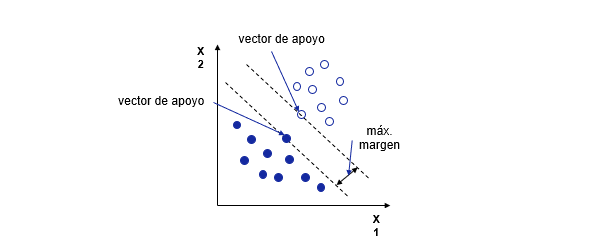

**COMO FUNCIONA?**

**Separación lineal:**
Si los datos son linealmente separables, SVM encuentra un hiperplano lineal que maximiza el margen entre las clases.

**Datos no lineales:**
Si los datos no son lineales, SVM usa el truco del kernel para transformar los datos a un espacio de mayor dimensión donde sean separables. Los kernels comunes son:

  * **Lineal:** Para datos separables linealmente.

  * **Polinómico:** Permite separar con curvas polinomiales.

  * **RBF (Radial Basis Function):** Muy usado para separar datos complejos.

  * **Sigmoide:** Menos común, similar a una función de activación de redes neuronales.

**Maximización del margen:**
SVM no solo clasifica, sino que maximiza la distancia entre las clases, lo que generalmente mejora la generalización del modelo.

---

**EN IA DONDE SE USA?**

* Detección de spam

* Reconocimiento facial

* Diagnóstico médico (por ejemplo, cáncer)

* Clasificación de imágenes y texto

**SVM destaca porque:**

* Funciona bien en espacios de alta dimensión.

* Es eficaz con conjuntos de datos donde hay pocas muestras y muchas características.

* Puede usar kernels para modelar relaciones no lineales complejas.

---

In [ ]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargamos el dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las primeras dos características para visualizar
y = iris.target

# 2. Dividimos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Normalizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Creamos el clasificador SVM
svm_model = SVC(kernel='linear', C=1.0)  # kernel lineal
svm_model.fit(X_train, y_train)

# 5. Realizamos predicciones
y_pred = svm_model.predict(X_test)

# 6. Evaluamos el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 7. Visualizamos la frontera de decisión (solo para 2 características)
def plot_svc(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlabel('Longitud del sépalo')
    plt.ylabel('Anchura del sépalo')
    plt.title('Frontera de decisión SVM')
    plt.show()

plot_svc(svm_model, X_train, y_train)


**EJERCICIOS**

Un cliente de una empresa de telecomunicaciones quiere predecir si un usuario contratará un plan premium o no, basándose en características como la duración de llamadas, número de llamadas al mes y consumo de datos.

Se propone usar SVM de clasificación para predecir “sí” o “no” (1 o 0).

In [ ]:
# Importamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Creamos un dataset de ejemplo (simulación de datos del cliente)
data = {
    'duracion_llamadas': [200, 50, 400, 300, 100, 50, 450, 500, 250, 30],
    'numero_llamadas': [30, 10, 50, 40, 15, 5, 60, 70, 35, 5],
    'consumo_datos': [5, 1, 10, 8, 2, 1, 12, 15, 6, 0.5],
    'plan_premium': [1, 0, 1, 1, 0, 0, 1, 1, 1, 0]  # 1=Sí, 0=No
}

df = pd.DataFrame(data)

# 2. Separamos variables predictoras y target
X = df[['duracion_llamadas', 'numero_llamadas', 'consumo_datos']]
y = df['plan_premium']

# 3. Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Escalamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Creamos el modelo SVM para clasificación
svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(X_train, y_train)

# 6. Predicciones
y_pred = svm_clf.predict(X_test)

# 7. Evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


**CONTEXTO:**

Un cliente de inmobiliaria quiere predecir el precio de una vivienda según características como superficie (m²), número de habitaciones y antigüedad de la propiedad.

* Se propone usar SVM de regresión (SVR) para estimar el precio.

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 1. Creamos dataset simulado
data = {
    'superficie_m2': [50, 70, 120, 100, 80, 60, 150, 200, 90, 110],
    'num_habitaciones': [2, 3, 4, 3, 3, 2, 5, 6, 3, 4],
    'antiguedad': [10, 5, 20, 15, 7, 12, 25, 30, 8, 18],
    'precio': [150000, 200000, 350000, 300000, 220000, 160000, 400000, 500000, 210000, 320000]
}

df = pd.DataFrame(data)

# 2. Variables predictoras y target
X = df[['superficie_m2', 'num_habitaciones', 'antiguedad']]
y = df['precio']

# 3. Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Escalamos datos (muy importante en SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

# 5. Creamos modelo SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# 6. Predicciones
y_pred_scaled = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))

# 7. Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Predicciones:", y_pred.ravel())
print("MSE:", mse)
print("R2:", r2)


#**ALGORITMOS DE CONJUNTO**

Los algoritmos de conjunto (ensemble methods) son técnicas de aprendizaje automático que combinan múltiples modelos (llamados “aprendices base”) para obtener un modelo final más robusto, preciso y estable que cualquiera de los modelos individuales.

En Inteligencia Artificial, se usan para mejorar clasificación, regresión o predicción, aprovechando que “la combinación de varios modelos suele superar al mejor modelo individual”.

---

**Los algoritmos de conjunto combinan varios modelos “débiles” o “simples” para crear un modelo más fuerte y robusto.**

La idea es que la combinación de varios modelos dé mejores predicciones que un solo modelo.

**Hay dos enfoques principales:**

* **Bagging (Bootstrap Aggregating):** Reducen la varianza del modelo.

* **Boosting:** Reducen el sesgo del modelo y mejoran la precisión enfocándose en errores anteriores.

.

---

###**Conceptos clave:**

1. **Aprendices base (base learners):** Modelos individuales que se combinan.

    * Pueden ser árboles de decisión, regresores lineales, SVM, etc.

2. **Método de combinación:** Forma de combinar los modelos individuales para obtener la predicción final.

    * **Votación (Voting):** Para clasificación. Cada modelo “vota” y se elige la clase con más votos.

    * **Promedio (Averaging):** Para regresión. Se promedian las predicciones de los modelos.





##**ENFOQUES PRINCIPALES**

###**Bagging (Bootstrap Aggregating):**

Bagging (Bootstrap Aggregating) combina varios modelos “débiles” o simples, pero lo hace en paralelo: cada modelo se entrena de manera independiente usando diferentes subconjuntos aleatorios de los datos (con reemplazo).

Esto permite que el modelo final tenga menos varianza y sea más robusto frente a sobreajuste.

**Ejemplo:** Random Forest.

.

**Principales características:**

* Los modelos se entrenan de manera independiente y paralela.

* Se crean subconjuntos de datos aleatorios (con reemplazo) para cada modelo.

* Al final, se combinan las predicciones mediante votación (clasificación) o promedio (regresión).

.

**Ejemplos:**

**Random Forest**

* Es un tipo de Bagging aplicado específicamente a árboles de decisión.

* Cada árbol se entrena con un subconjunto aleatorio de los datos y con un subconjunto aleatorio de las características.

* La predicción final se realiza mediante votación (para clasificación) o promedio (para regresión).

**Ventajas de Bagging:**

* Reduce la varianza del modelo y previene sobreajuste.

* Funciona muy bien con modelos inestables, como árboles de decisión.

.

**Resumen conceptual:**

* **Bagging =** paralelo → varios modelos independientes → se combinan resultados.

* **Random Forest =** Bagging + árboles + selección aleatoria de características.

.

---

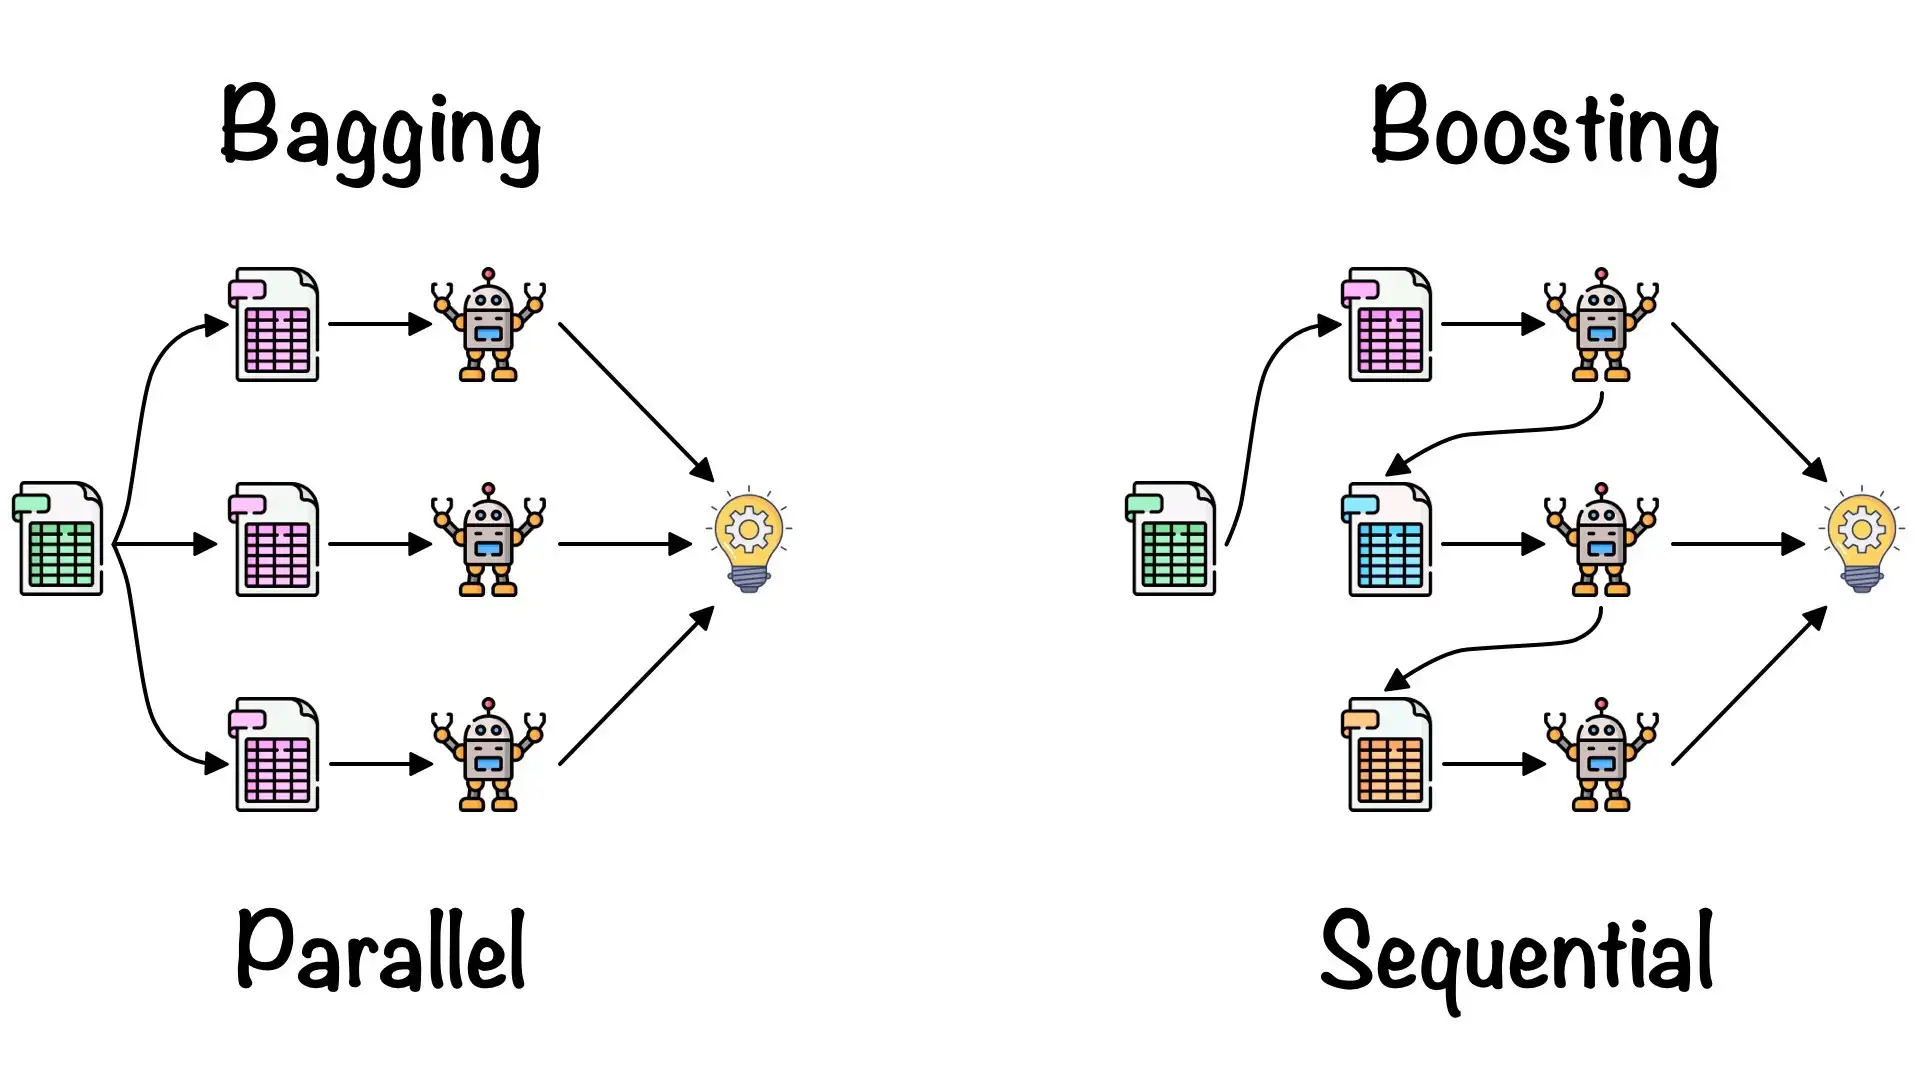

---

####**Boosting:**

Boosting también combina varios modelos, pero lo hace en secuencia: cada modelo nuevo intenta corregir los errores del modelo anterior.

Esto permite que el modelo final tenga menos sesgo y mejore la precisión.

* **Ejemplo:** AdaBoost, Gradient Boosting, XGBoost.

**Principales características:**

* Los modelos se entrenan secuencialmente.

* Se da más peso a las observaciones que fueron clasificadas incorrectamente por modelos anteriores.

* Es muy eficaz para problemas donde los modelos simples fallan.

**Ejemplos:**

**AdaBoost (Adaptive Boosting)**

* Ajusta los pesos de los datos según los errores previos.

* Cada nuevo modelo presta más atención a los casos mal clasificados.

* Se puede usar con árboles de decisión “débiles” (stumps, árboles de 1 nivel).

**Gradient Boosting**

* Optimiza un modelo agregando modelos secuenciales, pero en lugar de ajustar pesos, cada modelo intenta predecir el residuo (error) del modelo anterior.

* Muy usado en problemas de regresión y clasificación.

**Diferencia AdaBoost vs Gradient Boosting:**

* **AdaBoost:** ajusta pesos de las observaciones.

* **Gradient Boosting:** ajusta los errores de predicción directamente (gradientes).

##**RANDOM FOREST**

Random Forest es un algoritmo de aprendizaje supervisado que puede usarse tanto para clasificación como para regresión. Es un tipo de modelo de conjunto (ensemble) que combina múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste (overfitting).

En lugar de depender de un solo árbol de decisión, Random Forest construye muchos árboles y luego combina sus resultados usando votación mayoritaria (para clasificación) o promedio (para regresión).

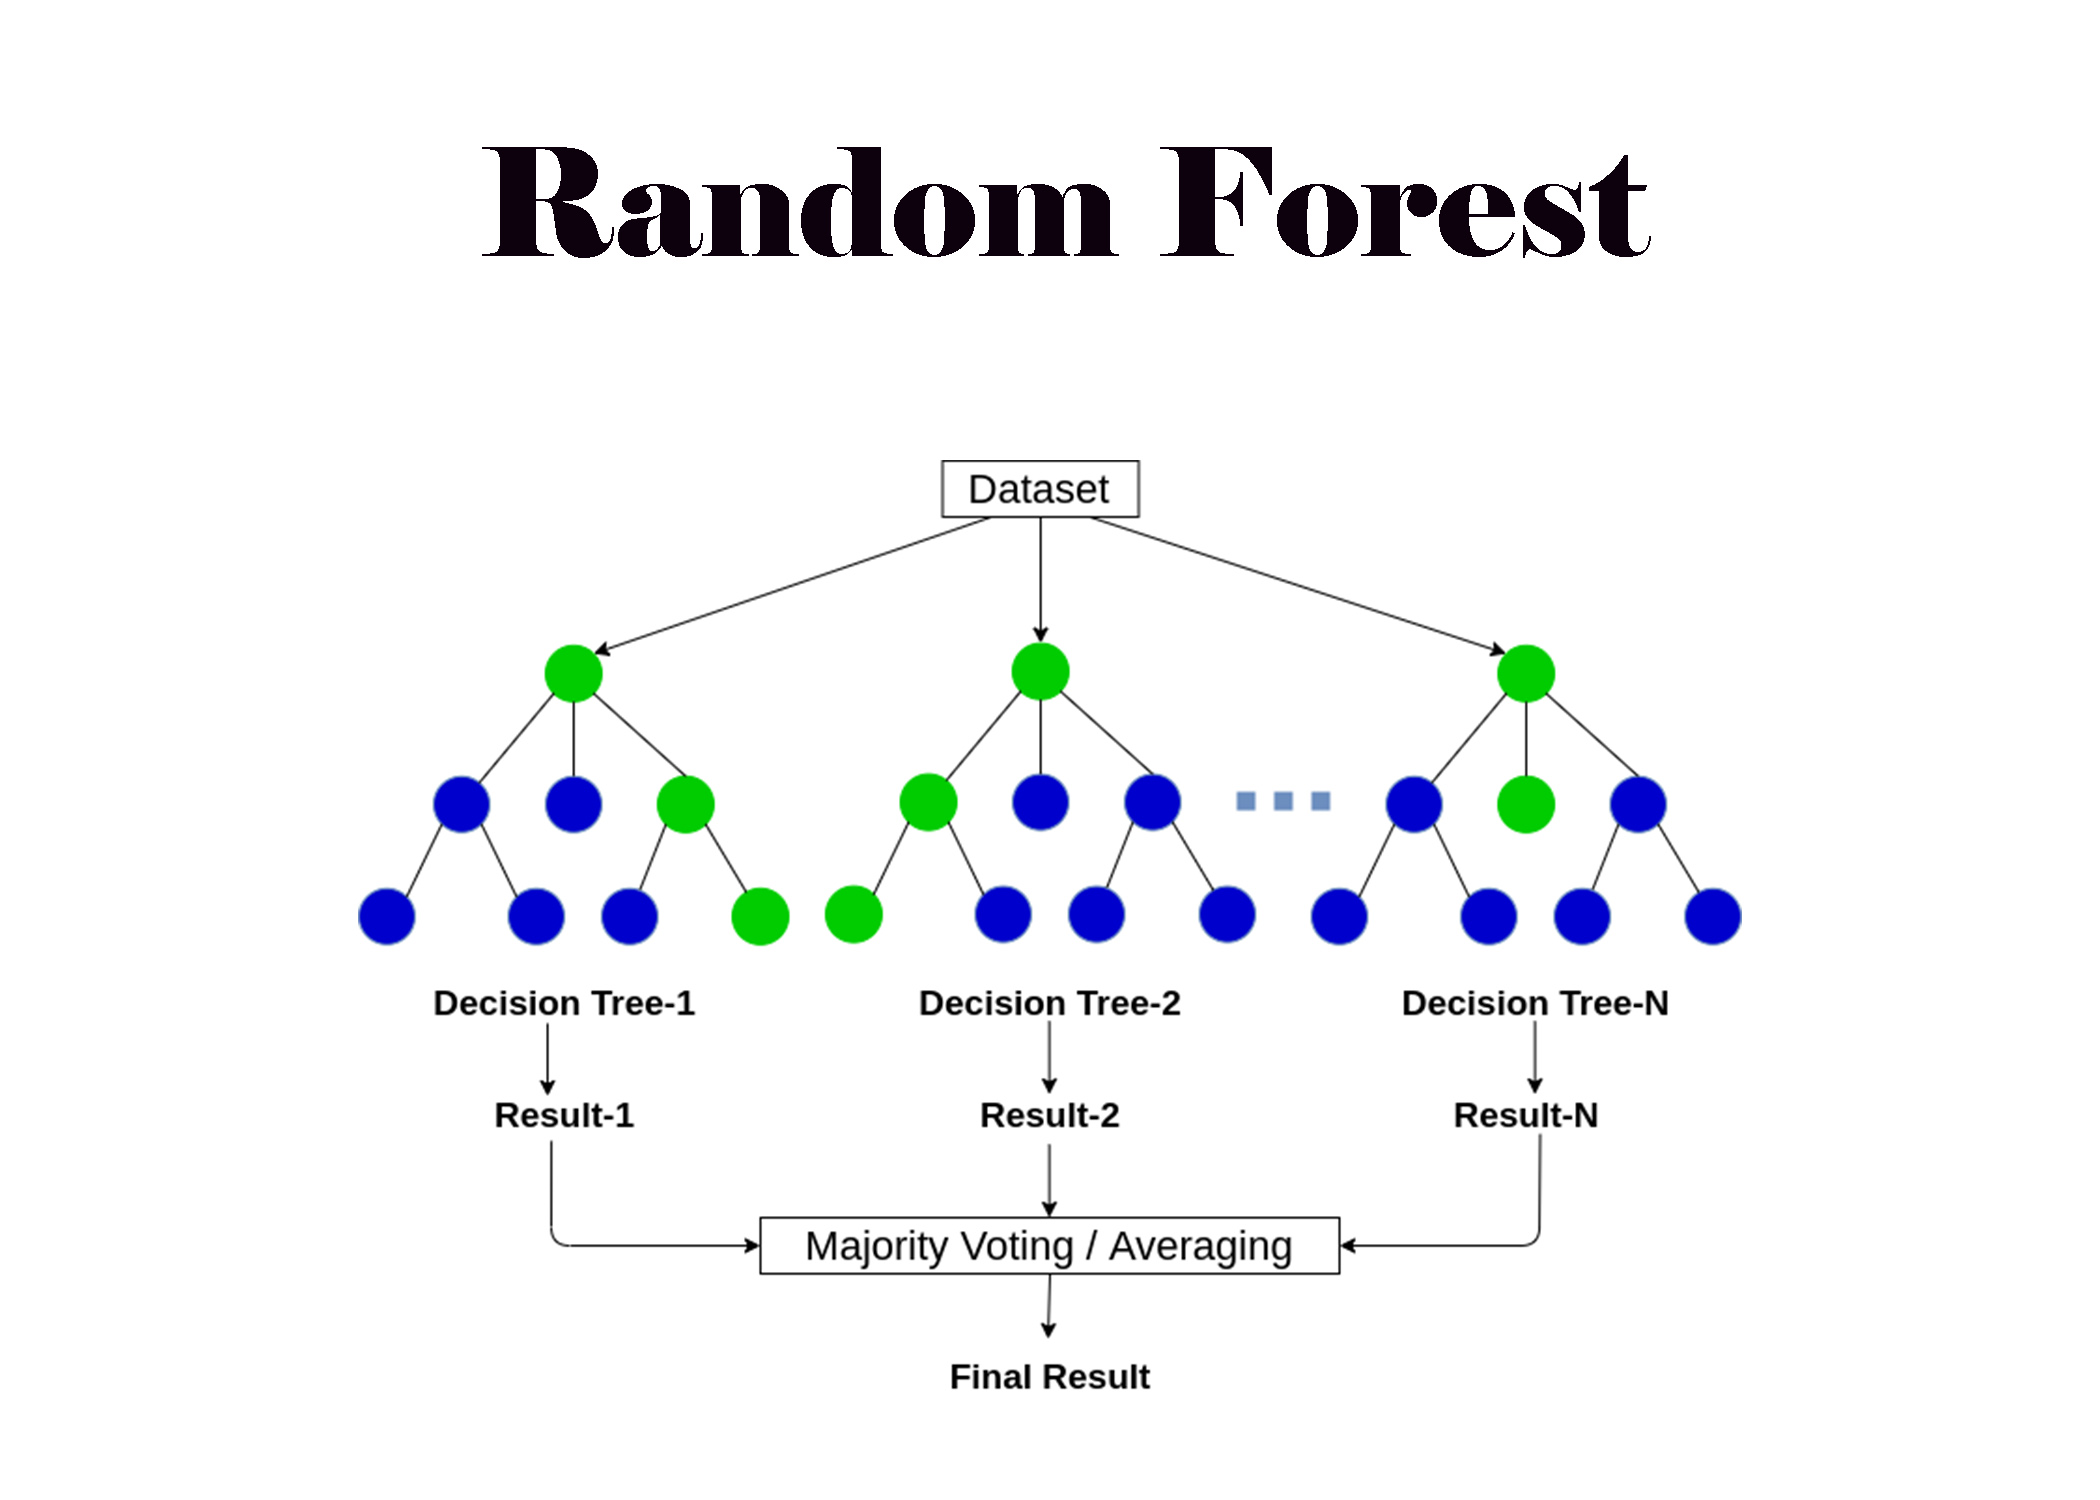

###**Cómo funciona internamente:**

1. **Muestreo aleatorio de los datos (Bootstrap):**

Random Forest toma submuestras aleatorias con reemplazo de los datos de entrenamiento. Esto significa que algunos datos pueden repetirse en una submuestra, mientras que otros no se incluyen.

**Este proceso se llama bagging (Bootstrap Aggregating).**

2. **Construcción de cada árbol:**

Para cada nodo del árbol, se selecciona un subconjunto aleatorio de características y se elige la mejor división solo entre estas características.

Esto introduce diversidad entre los árboles, haciendo que no todos los árboles sean iguales y reduciendo la correlación entre ellos.

3. **Predicción final:**

    * **Clasificación:** Cada árbol da un voto para la clase predicha, y la clase con más votos es la predicción final.

    * **Regresión:** Se calcula el promedio de los valores predichos por todos los árboles.

####**SINTAXIS**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


####**EJEMPLO**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos de ejemplo
iris = load_iris()
X = iris.data
y = iris.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predecir
y_pred = rf.predict(X_test)

# Evaluar precisión
print("Accuracy:", accuracy_score(y_test, y_pred))

* **n_estimators=100** → Número de árboles en el bosque.

* **max_depth=5** → Profundidad máxima de cada árbol.

* **fit** → Entrena el modelo con los datos de entrenamiento.

* **predict** → Genera predicciones para los datos de prueba.

####**PRACTICA**

####**Contexto:**

En una universidad, el departamento de bienestar estudiantil quiere predecir si un estudiante tiene riesgo de abandonar la carrera, basado en características académicas y personales (como promedio de calificaciones, asistencia, participación en actividades, etc.). Para ello, se usará un modelo de Random Forest para clasificar a los estudiantes en "riesgo" o "no riesgo".


In [ ]:
# Importamos librerías necesarias
from sklearn.ensemble import RandomForestClassifier   # Random Forest para clasificación
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.datasets import make_classification      # Generamos un dataset de ejemplo
import numpy as np

# Creamos un dataset simulado: 500 estudiantes, 10 características, 2 clases (riesgo/no riesgo)
X, y = make_classification(
    n_samples=500,       # número de estudiantes
    n_features=10,       # número de características (ej: promedio, asistencia, participación)
    n_informative=6,     # cuántas características realmente aportan información
    n_redundant=2,       # características redundantes
    n_classes=2,         # 2 clases: riesgo/no riesgo
    random_state=42
)

# Dividimos los datos en entrenamiento (75%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creamos el modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=100,    # número de árboles en el bosque
    max_depth=None,      # profundidad máxima de los árboles (sin límite)
    random_state=42,     # semilla para reproducibilidad
    n_jobs=-1            # usar todos los núcleos de la CPU
)

# Entrenamos el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Evaluamos la precisión del modelo en los datos de prueba
accuracy = rf.score(X_test, y_test)
print("Precisión del Random Forest:", accuracy)

# Obtenemos la importancia de cada característica
importances = rf.feature_importances_

# Ordenamos las características por importancia y mostramos las 5 más relevantes
top_idx = np.argsort(importances)[::-1][:5]
print("Top 5 características más importantes (índices):", top_idx)
print("Importancia de cada una:", importances[top_idx])


---

##**BOOSTING**

###**AdaBoost**

**AdaBoost, que significa Adaptive Boosting**, es un algoritmo de Boosting que **combina varios modelos simples, llamados weak learners (aprendices débiles)**, para crear un modelo final más fuerte y preciso.

* Es un método secuencial, lo que significa que cada nuevo modelo se construye enfocándose en los errores del modelo anterior.

* Funciona principalmente para problemas de clasificación, aunque también puede adaptarse a regresión.

**Cómo funciona AdaBoost**

1. Inicialmente, todos los datos tienen el mismo peso.

2. Se entrena un modelo débil (por ejemplo, un árbol de decisión muy pequeño llamado stump).

3. Se evalúa su rendimiento y se aumenta el peso de los ejemplos mal clasificados, de modo que el siguiente modelo se concentre más en esos errores.

4. Se repite este proceso varias veces, creando una secuencia de modelos.

5. Finalmente, las predicciones de todos los modelos se combinan usando una votación ponderada, donde los modelos más precisos tienen mayor influencia.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, learning_rate=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


**Principales características**

* Cada modelo presta más atención a los ejemplos que los modelos anteriores clasificaron incorrectamente.

* Combina modelos débiles para formar un modelo fuerte.

* Es eficiente y relativamente simple de implementar.

* Reduce el sesgo y mejora la precisión del modelo.

**EJEMPLO**

**Supongamos que queremos clasificar estudiantes en aprobado o reprobado según su desempeño en exámenes:**

1. Se entrena un árbol muy simple para predecir aprobado/reprobado.

2. Los estudiantes que fueron clasificados incorrectamente reciben más peso.

3. Se entrena un segundo árbol, que ahora se enfoca más en esos estudiantes difíciles de clasificar.

4. Se repite varias veces y se combinan los resultados para obtener la predicción final.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Datos de ejemplo: puntajes de 15 estudiantes en 2 exámenes
# X = [puntaje examen 1, puntaje examen 2]
# y = 1 (aprobado), 0 (reprobado)
X = [
    [85, 90],  # aprobado
    [78, 75],  # aprobado
    [92, 88],  # aprobado
    [65, 70],  # aprobado
    [50, 55],  # reprobado
    [40, 45],  # reprobado
    [60, 62],  # aprobado
    [58, 50],  # reprobado
    [95, 98],  # aprobado
    [48, 52],  # reprobado
    [70, 65],  # aprobado
    [30, 40],  # reprobado
    [88, 85],  # aprobado
    [55, 60],  # reprobado
    [67, 68]   # aprobado
]
y = [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

# Dividimos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Árbol débil
stump = DecisionTreeClassifier(max_depth=1, random_state=42)

# AdaBoost con 10 iteraciones
adaboost = AdaBoostClassifier(
    estimator=stump,
    n_estimators=10,
    learning_rate=1.0,
    random_state=42
)

# Entrenamos el modelo
adaboost.fit(X_train, y_train)

# Hacemos predicciones
y_pred = adaboost.predict(X_test)

# Evaluamos precisión
accuracy = accuracy_score(y_test, y_pred)

print("Predicciones:", y_pred)
print("Valores reales:", y_test)
print("Precisión:", accuracy)



###**Gradient Boosting**

Gradient Boosting es un algoritmo de Boosting, similar a AdaBoost, pero con un enfoque más avanzado:

También combina varios modelos “débiles” (usualmente árboles de decisión pequeños) para crear un modelo fuerte y preciso.

La diferencia clave es que cada nuevo modelo no ajusta pesos de los datos, sino que intenta predecir los errores (residuos) del modelo anterior.

Es muy popular en problemas de regresión y clasificación, y es la base de algoritmos avanzados como XGBoost, LightGBM y CatBoost.

**Cómo funciona Gradient Boosting**

1. Se entrena un modelo inicial muy simple (por ejemplo, un árbol pequeño).

2. Se calculan los residuos, que son la diferencia entre las predicciones del modelo y los valores reales:
residuo=valor real−prediccion

3. Se entrena un nuevo modelo para predecir esos residuos.

4. Se suma la predicción del nuevo modelo a la predicción del modelo anterior, ajustando así el error.

5. Este proceso se repite varias veces, agregando gradualmente correcciones a los errores.

6. Finalmente, se obtiene un modelo fuerte que minimiza el error total de manera eficiente.

**Principales características**

* Los modelos se entrenan secuencialmente, igual que AdaBoost.

* Cada modelo intenta corregir los errores residuales del conjunto de modelos anteriores.

* Muy eficaz para problemas de regresión y clasificación, especialmente con datos complejos.

* Puede usar árboles de decisión como base, pero también se puede adaptar a otros modelos.

**Ejemplo conceptual**

Supongamos que queremos predecir la nota final de un estudiante (regresión) según sus puntajes parciales:

* Primer modelo predice un valor aproximado para la nota final.

* Calculamos el residuo: cuánto se equivocó la predicción.

* Segundo modelo predice ese residuo y ajusta la predicción del primer modelo.

* Se repite varias veces, corrigiendo cada vez los errores restantes.

* La predicción final es la suma de todas las predicciones secuenciales.

**EJEMPLO**

In [ ]:
# Importamos las librerías necesarias
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Datos de ejemplo: puntajes parciales de 15 estudiantes
# X = [puntaje examen 1, puntaje examen 2]
# y = nota final
X = [
    [85, 90],
    [78, 75],
    [92, 88],
    [65, 70],
    [50, 55],
    [40, 45],
    [60, 62],
    [58, 50],
    [95, 98],
    [48, 52],
    [70, 65],
    [30, 40],
    [88, 85],
    [55, 60],
    [67, 68]
]

y = [87, 77, 90, 68, 52, 42, 63, 54, 96, 50, 68, 35, 86, 57, 67]

# Dividimos los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo Gradient Boosting para regresión
gbr = GradientBoostingRegressor(
    n_estimators=5,    # número de modelos secuenciales
    learning_rate=0.1, # cuánto aporta cada modelo al resultado final
    max_depth=2,       # profundidad máxima de cada árbol débil
    random_state=42
)

# Entrenamos el modelo con los datos de entrenamiento
gbr.fit(X_train, y_train)

# Hacemos predicciones sobre el conjunto de prueba
y_pred = gbr.predict(X_test)

# Evaluamos el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mostramos resultados
print("Predicciones:", y_pred)
print("Valores reales:", y_test)
print("Error cuadrático medio (MSE):", mse)


**Como lo mejoramos?**

* Aumentar n_estimators → más árboles secuenciales para corregir errores.

* Ajustar learning_rate → menor learning_rate con más árboles mejora la estabilidad.

* Incrementar ligeramente max_depth → permite capturar mejor patrones sin sobreajustar.

* Opcional: usar random_state para reproducibilidad y test_size adecuada.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Datos de ejemplo: puntajes parciales de 15 estudiantes
X = [
    [85, 90],
    [78, 75],
    [92, 88],
    [65, 70],
    [50, 55],
    [40, 45],
    [60, 62],
    [58, 50],
    [95, 98],
    [48, 52],
    [70, 65],
    [30, 40],
    [88, 85],
    [55, 60],
    [67, 68]
]

y = [87, 77, 90, 68, 52, 42, 63, 54, 96, 50, 68, 35, 86, 57, 67]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo Gradient Boosting mejorado
gbr = GradientBoostingRegressor(
    n_estimators=100,   # más árboles para corregir errores residuales
    learning_rate=0.1,  # contribución moderada de cada árbol
    max_depth=3,        # árboles un poco más profundos para capturar patrones
    random_state=42
)

# Entrenamiento
gbr.fit(X_train, y_train)

# Predicciones
y_pred = gbr.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)

print("Predicciones:", y_pred)
print("Valores reales:", y_test)
print("Error cuadrático medio (MSE):", mse)


##**Cuando conviene usar cada tecnica?**



* Si tu modelo base (por ejemplo, un árbol) tiene alta varianza → usar bagging / random forest para estabilizarlo.

* Si el objetivo es maximizar precisión y no te importa un entrenamiento secuencial más lento → boosting (XGBoost/LightGBM) suele ser top en competiciones.

* Si tienes distintos tipos de modelos con comportamientos complementarios → voting o stacking (stacking es más avanzado: un meta-modelo aprende a combinar predicciones).

* Para problemas con pocos datos pero ruidosos o con señales débiles → probar SVM (si no es muy grande) o boosting con regularización.